# Credit Risk Analysis and Prediction:
## Harnessing Machine Learning to Evaluate and Forecast Loan Defaults

### Introduction

In the realm of financial services, assessing credit risk is a cornerstone for lending decisions. The 'Credit Risk Analysis and Prediction' project aims to bring data science into the equation, employing machine learning algorithms to predict the likelihood of loan defaults. Our objectives are threefold: to construct a predictive model that identifies potential loan defaults, to comprehend the key variables affecting credit risk, and to enable financial institutions to make more data-driven decisions. The methodology follows a structured data science pipeline—starting from data exploration and cleaning, moving to feature engineering and model selection, and concluding with model evaluation and deployment. For this analytical journey, we'll be using Python, Pandas, Scikit-learn, Matplotlib, and Seaborn as our toolkit.

## Data Import and Cleaning
Here, the data will be imported and initial exploration will be performed to understand its structure and content.

In [1]:
# First we can start with importing the libraries we know we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [2]:
# Let's import the dataset that we will be working with
df = pd.read_csv('credit_risk.csv')
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


### Information about the dataset


The dataset contains the following variables:

ID: Unique identifier for each loan applicant.

Age: Age of the loan applicant.

Income: Income of the loan applicant.

Home: Home ownership status (Own, Mortgage, Rent).

Emp_Length: Employment length in years.

Intent: Purpose of the loan (e.g., education, home improvement).

Amount: Loan amount applied for.

Rate: Interest rate on the loan.

**This is our target:** Status: Loan approval status (Fully Paid, Charged Off, Current).

Percent_Income: Loan amount as a percentage of income.

Default: Whether the applicant has defaulted on a loan previously (Yes, No).

Cred_Length: Length of the applicant's credit history.

In [3]:
# Let's get a general idea of the data and see if there are any weird data types that may need to be changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


Something to note is that the feature 'Home', 'Intent' and 'Default' are objects. 'Home' denotes whether the client rents, owns or has a mortgage on their home. Since home ownership could be a significant indicator of financial stability we will need to encode this feature for use in the model. We will acheive this with one hot encoding.

'Intent' is the purpose of the loan and could have correlation to certain factors like if the intent is debt consolidation and the loan amount is a high percentage of their income, this may show that the customer isn't very reliable with making payments. For that reason, I want to keep as much of the feature as possible. Since there isn't really an ordinaly nature to the feature, more just categorical, we will also one hot encode it as well.

'Default' is actually our target variable and contains 2 unique values, 'Y' and 'N' denoting whether the loan is in default or not. We will use binary encoding on that feature.

In [4]:
# Perform one-hot encoding on the 'Home' feature
df = pd.get_dummies(df, columns=['Home', 'Intent'])


In [5]:
df.head()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,123.0,35000,16.02,1,0.59,Y,3,False,False,False,True,False,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,N,2,False,False,True,False,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,N,3,True,False,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,N,2,False,False,False,True,False,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,Y,4,False,False,False,True,False,False,False,True,False,False


Something to notice is that the 0 index client has an 'emp_length' of 123 but is aged 22, so that is surely a mistake. We will need to look out for outliers like this later.

In [6]:
# Convert 'Y' to 1 and 'N' to 0 for the 'Default' column
df['Default'] = df['Default'].map({'Y': 1, 'N': 0})

In [7]:
# Let's check the data types again to make sure everything is correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        32581 non-null  int64  
 1   Age                       32581 non-null  int64  
 2   Income                    32581 non-null  int64  
 3   Emp_length                31686 non-null  float64
 4   Amount                    32581 non-null  int64  
 5   Rate                      29465 non-null  float64
 6   Status                    32581 non-null  int64  
 7   Percent_income            32581 non-null  float64
 8   Default                   32581 non-null  int64  
 9   Cred_length               32581 non-null  int64  
 10  Home_MORTGAGE             32581 non-null  bool   
 11  Home_OTHER                32581 non-null  bool   
 12  Home_OWN                  32581 non-null  bool   
 13  Home_RENT                 32581 non-null  bool   
 14  Intent

In [8]:
# Let's see if there are any missing values
df.isnull().sum()

Id                             0
Age                            0
Income                         0
Emp_length                   895
Amount                         0
Rate                        3116
Status                         0
Percent_income                 0
Default                        0
Cred_length                    0
Home_MORTGAGE                  0
Home_OTHER                     0
Home_OWN                       0
Home_RENT                      0
Intent_DEBTCONSOLIDATION       0
Intent_EDUCATION               0
Intent_HOMEIMPROVEMENT         0
Intent_MEDICAL                 0
Intent_PERSONAL                0
Intent_VENTURE                 0
dtype: int64

Saved dataframe here 'credit_risk_cleaned.csv'


In [9]:
#load the cleaned data

# df = pd.read_csv('credit_risk_cleaned.csv')
# df.head()

In [10]:
df.head()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,123.0,35000,16.02,1,0.59,1,3,False,False,False,True,False,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,0,3,True,False,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,False,True,False,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,False,True,False,False,False,True,False,False


We can see that we have 2 features with some missing values. The 'emp_length' feature is how long the client has been employed which can show stable and reliable income, which is typically a necesity when staying up to date with loan payments.

The 'Rate' feature refers to the interest rate of the loan. This could also be important depending on if the client has a high interest rate, causing their payment to be higher and that may impact their ability to pay back the loan. Let's work with the 'Rate' feature first.

### Imputation Strategy for 'Rate' Based on 'Intent'

#### Why Choose This Method?
Contextual Relevance: The interest rate ('Rate') of a loan can be significantly influenced by the purpose or 'Intent' of the loan. Different types of loans typically come with different risk profiles and, consequently, different interest rates. For example, educational loans may have different average rates compared to personal loans.

Reduced Bias: This method is likely to introduce less bias into the imputed data. A simple mean or median imputation would not account for the varying risk profiles associated with different loan intents, potentially skewing our model's understanding of the data.

Data Complexity vs. Accuracy: While this imputation strategy adds a layer of complexity to our data preparation, it could result in a more nuanced and accurate dataset, better suited for predictive modeling.

How Does It Work?
The data is grouped by the 'Intent' of the loan.
The mean 'Rate' is calculated for each group.
These mean rates are then used to fill in the missing 'Rate' values corresponding to each 'Intent' group.
By adopting this imputation strategy, we aim to preserve the natural variations in interest rates that could be dictated by the 'Intent' of the loan, thereby maintaining the integrity and complexity of our dataset.

In [11]:
# Calculate the mean 'Rate' for each unique 'Intent' after one-hot decoding the 'Intent' feature
intent_columns = [col for col in df.columns if 'Intent_' in col]
df['Original_Intent'] = df[intent_columns].idxmax(axis=1).str.replace('Intent_', '')

# Group the data by 'Original_Intent' and calculate the mean 'Rate' for each group
mean_rate_by_intent = df.groupby('Original_Intent')['Rate'].mean()

# Apply the mean 'Rate' imputation based on 'Original_Intent'
for intent in mean_rate_by_intent.index:
    mask = (df['Original_Intent'] == intent) & (df['Rate'].isnull())
    df.loc[mask, 'Rate'] = mean_rate_by_intent[intent]

# Drop the temporary 'Original_Intent' column
df.drop('Original_Intent', axis=1, inplace=True)

# Check if the imputation was successful by summing the null values again
null_count_after_intent_imputation = df.isnull().sum()
null_count_after_intent_imputation


Id                            0
Age                           0
Income                        0
Emp_length                  895
Amount                        0
Rate                          0
Status                        0
Percent_income                0
Default                       0
Cred_length                   0
Home_MORTGAGE                 0
Home_OTHER                    0
Home_OWN                      0
Home_RENT                     0
Intent_DEBTCONSOLIDATION      0
Intent_EDUCATION              0
Intent_HOMEIMPROVEMENT        0
Intent_MEDICAL                0
Intent_PERSONAL               0
Intent_VENTURE                0
dtype: int64

Awesome... it looks like we only have 'emp_length' to worry about now. Let's dig into some information regarding that feature

In [12]:
# Get descriptive statistics for the 'Emp_length' feature
emp_length_stats = df['Emp_length'].describe()

# Count the frequency of each unique value in 'Emp_length'
emp_length_value_counts = df['Emp_length'].value_counts().sort_index()

emp_length_stats, emp_length_value_counts


(count    31686.000000
 mean         4.789686
 std          4.142630
 min          0.000000
 25%          2.000000
 50%          4.000000
 75%          7.000000
 max        123.000000
 Name: Emp_length, dtype: float64,
 Emp_length
 0.0      4105
 1.0      2915
 2.0      3849
 3.0      3456
 4.0      2874
 5.0      2946
 6.0      2666
 7.0      2196
 8.0      1687
 9.0      1367
 10.0      696
 11.0      740
 12.0      575
 13.0      426
 14.0      335
 15.0      238
 16.0      165
 17.0      129
 18.0      104
 19.0       64
 20.0       42
 21.0       38
 22.0       19
 23.0       10
 24.0       10
 25.0        8
 26.0        6
 27.0        5
 28.0        3
 29.0        1
 30.0        2
 31.0        4
 34.0        1
 38.0        1
 41.0        1
 123.0       2
 Name: count, dtype: int64)

Notice that the max length is 123 which is highly improbable given that at least one of the entries is only age 22... We could drop those entries as they certainly are wrong, but since we are doing a bit of machine learning and want to build the most accurate model we can, lets use the mean employment length of those with the same age to replace those wrong entries.

In [13]:
# Filter the DataFrame to only show rows where 'Emp_length' is 123
entries_with_emp_length_123 = df[df['Emp_length'] == 123]
entries_with_emp_length_123


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,123.0,35000,16.02,1,0.59,1,3,False,False,False,True,False,False,False,False,True,False
210,210,21,192000,123.0,20000,6.54,0,0.10,0,4,True,False,False,False,False,False,False,False,False,True


So we see that they are both very young so they certainly can not have been employed for 123 years! Lets impute the mean employment length of each of their ages and replace their current employment lengths with the means.

In [14]:
# Calculate the mean 'Emp_length' for ages 22 and 21, excluding the outliers
mean_emp_length_age_22 = df[(df['Age'] == 22) & (df['Emp_length'] != 123)]['Emp_length'].mean()
mean_emp_length_age_21 = df[(df['Age'] == 21) & (df['Emp_length'] != 123)]['Emp_length'].mean()

# Round the imputed 'Emp_length' values to the nearest tenth
rounded_mean_emp_length_age_22 = round(mean_emp_length_age_22, 1)
rounded_mean_emp_length_age_21 = round(mean_emp_length_age_21, 1)

# Replace the outlier 'Emp_length' values of 123 with the calculated and rounded means for ages 22 and 21
df.loc[(df['Age'] == 22) & (df['Emp_length'] == 123), 'Emp_length'] = rounded_mean_emp_length_age_22
df.loc[(df['Age'] == 21) & (df['Emp_length'] == 123), 'Emp_length'] = rounded_mean_emp_length_age_21

# Re-check the entries with previously outlier 'Emp_length' values
rechecked_entries = df[df['Id'].isin([0, 210])][['Id', 'Age', 'Emp_length']]
rechecked_entries



,Id,Age,Emp_length
0,0,22,3.6
210,210,21,3.2


In [15]:
df.head()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,3.6,35000,16.02,1,0.59,1,3,False,False,False,True,False,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,0,3,True,False,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,False,True,False,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,False,True,False,False,False,True,False,False


In [16]:
df.isnull().sum()

Id                            0
Age                           0
Income                        0
Emp_length                  895
Amount                        0
Rate                          0
Status                        0
Percent_income                0
Default                       0
Cred_length                   0
Home_MORTGAGE                 0
Home_OTHER                    0
Home_OWN                      0
Home_RENT                     0
Intent_DEBTCONSOLIDATION      0
Intent_EDUCATION              0
Intent_HOMEIMPROVEMENT        0
Intent_MEDICAL                0
Intent_PERSONAL               0
Intent_VENTURE                0
dtype: int64

Given that I am not a credit risk data scientist (YET), I would typically defer to a senior advisor on the exact imputation method of the employment length, but in this case, I am going to use the same approach that I used to fix the outliers.

In [17]:
# Calculate the mean 'Emp_length' for each unique 'Age', excluding any existing outliers or implausible values
mean_emp_length_by_age = df[df['Emp_length'] < 100].groupby('Age')['Emp_length'].mean()

# Round the calculated means to the nearest tenth
rounded_mean_emp_length_by_age = mean_emp_length_by_age.round(1)

# Apply the mean 'Emp_length' imputation based on 'Age' for the null values
for age in rounded_mean_emp_length_by_age.index:
    mask = (df['Age'] == age) & (df['Emp_length'].isnull())
    df.loc[mask, 'Emp_length'] = rounded_mean_emp_length_by_age[age]

# Re-check for null values in each column of the DataFrame 'df'
null_count_after_emp_length_imputation = df.isnull().sum()
null_count_after_emp_length_imputation


Id                          0
Age                         0
Income                      0
Emp_length                  0
Amount                      0
Rate                        0
Status                      0
Percent_income              0
Default                     0
Cred_length                 0
Home_MORTGAGE               0
Home_OTHER                  0
Home_OWN                    0
Home_RENT                   0
Intent_DEBTCONSOLIDATION    0
Intent_EDUCATION            0
Intent_HOMEIMPROVEMENT      0
Intent_MEDICAL              0
Intent_PERSONAL             0
Intent_VENTURE              0
dtype: int64

In [18]:
df.head()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,3.6,35000,16.02,1,0.59,1,3,False,False,False,True,False,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,0,3,True,False,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,False,True,False,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,False,True,False,False,False,True,False,False


#### Saved dataframe here 'credit_risk_final.csv'

## Exploratory Data Analysis

#### Univariate Analysis

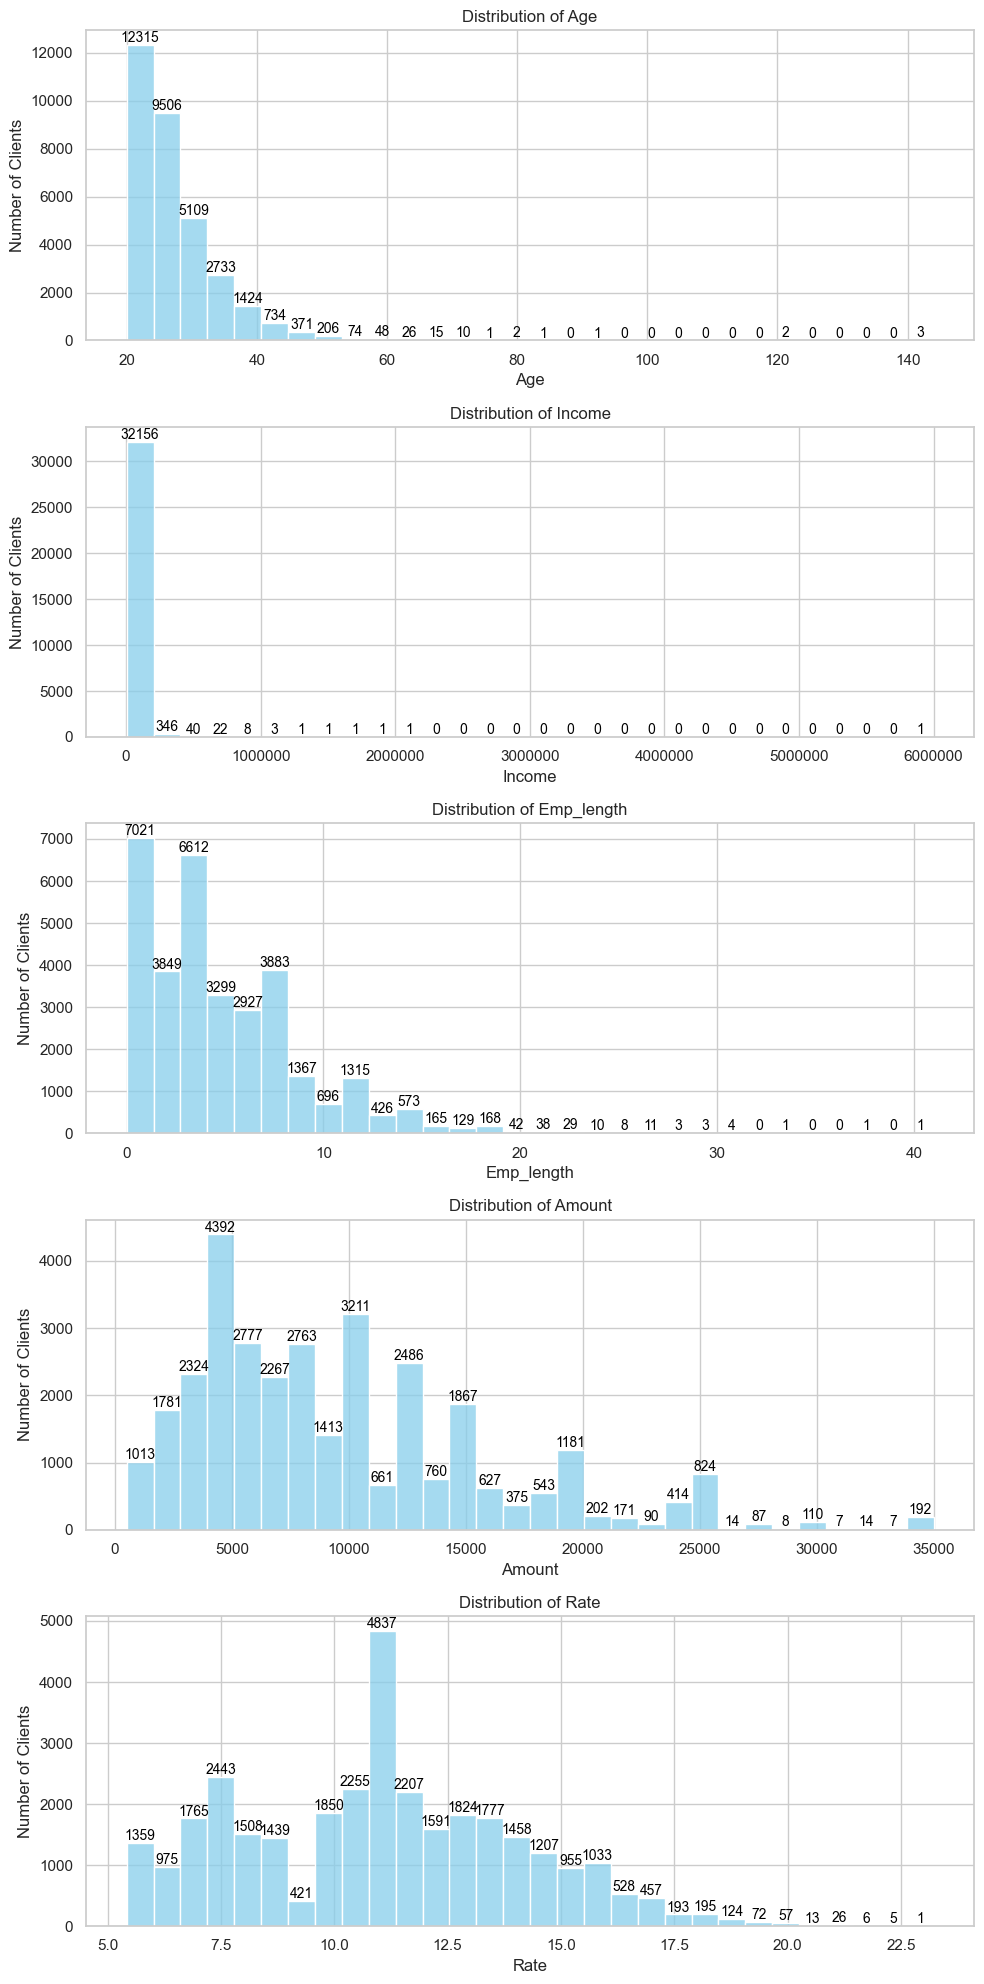

In [19]:
# Set up the aesthetic configurations for Seaborn
sns.set(style="whitegrid")

# List of key numerical variables for univariate analysis
numerical_vars = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate']

# Perform univariate analysis with updated y-axis labels and bin labels for numerical variables
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(10, 20))

for i, var in enumerate(numerical_vars):
    sns.histplot(df[var], bins=30, ax=axes[i], color='skyblue', kde=False)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Number of Clients')
    for patch in axes[i].patches:
        axes[i].annotate(f"{int(patch.get_height())}", (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                         ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                         textcoords='offset points')
    if var == 'Income':
        axes[i].ticklabel_format(style='plain', axis='x')  # Disable the scientific notation on x-axis for Income

plt.tight_layout()
plt.show()

#### Things to note:

Income, Emp_length, and Amount: The skewness here is not surprising, given the real-world distribution of income and loan amounts. Transformation could help but may also make interpretation less straightforward.

Rate: Multiple peaks suggest that certain rates are more common, which is often the case in financial products. Transformation might not add much value here.

Age: This feature is normally distributed, so no action needed.

In [20]:
df.head()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,3.6,35000,16.02,1,0.59,1,3,False,False,False,True,False,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,0,3,True,False,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,False,True,False,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,False,True,False,False,False,True,False,False


#### Bivariate Analysis

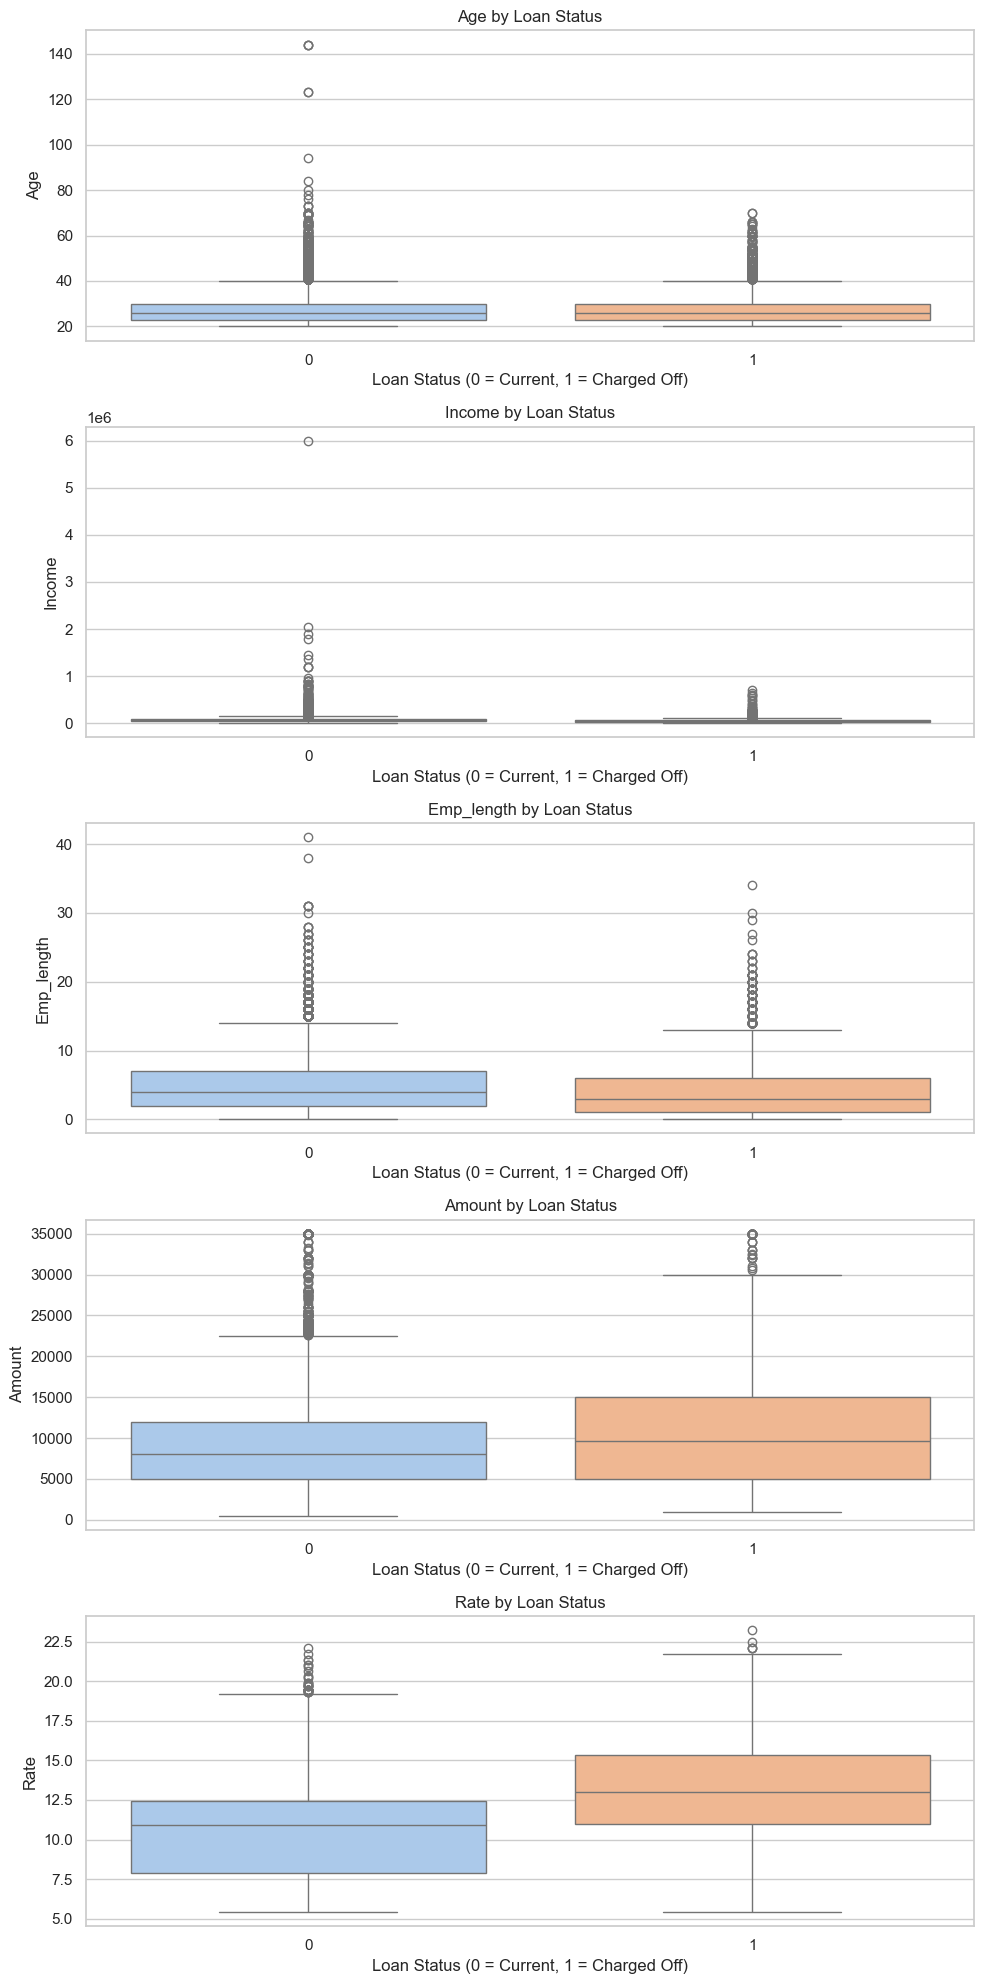

In [21]:
# Perform bivariate analysis again: Numerical variables vs. Target variable ('Default')
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(10, 20))

for i, var in enumerate(numerical_vars):
    sns.boxplot(x='Status', y=var, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{var} by Loan Status')
    axes[i].set_xlabel('Loan Status (0 = Current, 1 = Charged Off)')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


There seems to be some outliers in age... well above 120

In [22]:
# Check for entries where the 'Age' is greater than 100 to confirm the observation
outliers_in_age = df[df['Age'] > 100]
outliers_in_age[['Id', 'Age', 'Status']]


,Id,Age,Status
81,81,144,0
183,183,144,0
575,575,123,0
747,747,123,0
32297,32297,144,0


Something to think about is that 144 and 123 may have supposed to have been 44 and 23 given the 1 button's proximity to both 4 and 2 on a number pad... There isn't a sure fire way to know if this is the case but lets look into the data a bit more... lets isolate these entries and see if we can determine anything of value from the rest of the data

In [23]:
# Isolate the entries with outlier ages (144 and 123) to examine them in detail
age_outliers = df[df['Age'].isin([144, 123])]
age_outliers


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
81,81,144,250000,4.0,4800,13.570000,0,0.02,0,3,False,False,False,True,False,False,False,False,False,True
183,183,144,200000,4.0,6000,11.860000,0,0.03,0,2,True,False,False,False,False,True,False,False,False,False
575,575,123,80004,2.0,20400,10.250000,0,0.25,0,3,False,False,False,True,False,True,False,False,False,False
747,747,123,78000,7.0,20000,10.948275,0,0.26,0,4,False,False,False,True,False,False,False,False,False,True
32297,32297,144,6000000,12.0,5000,12.730000,0,0.00,0,25,True,False,False,False,False,False,False,False,True,False


Given that its plausible that these income figures, although fairly high, could be that of a 44 year old, I am deciding to go with my hypothesis that these were just entered wrong. I am going to update the ages to be 44 and 23 respectively

In [24]:
# Correct the outlier ages based on the hypothesis: 144 to 44 and 123 to 23
df.loc[df['Age'] == 144, 'Age'] = 44
df.loc[df['Age'] == 123, 'Age'] = 23

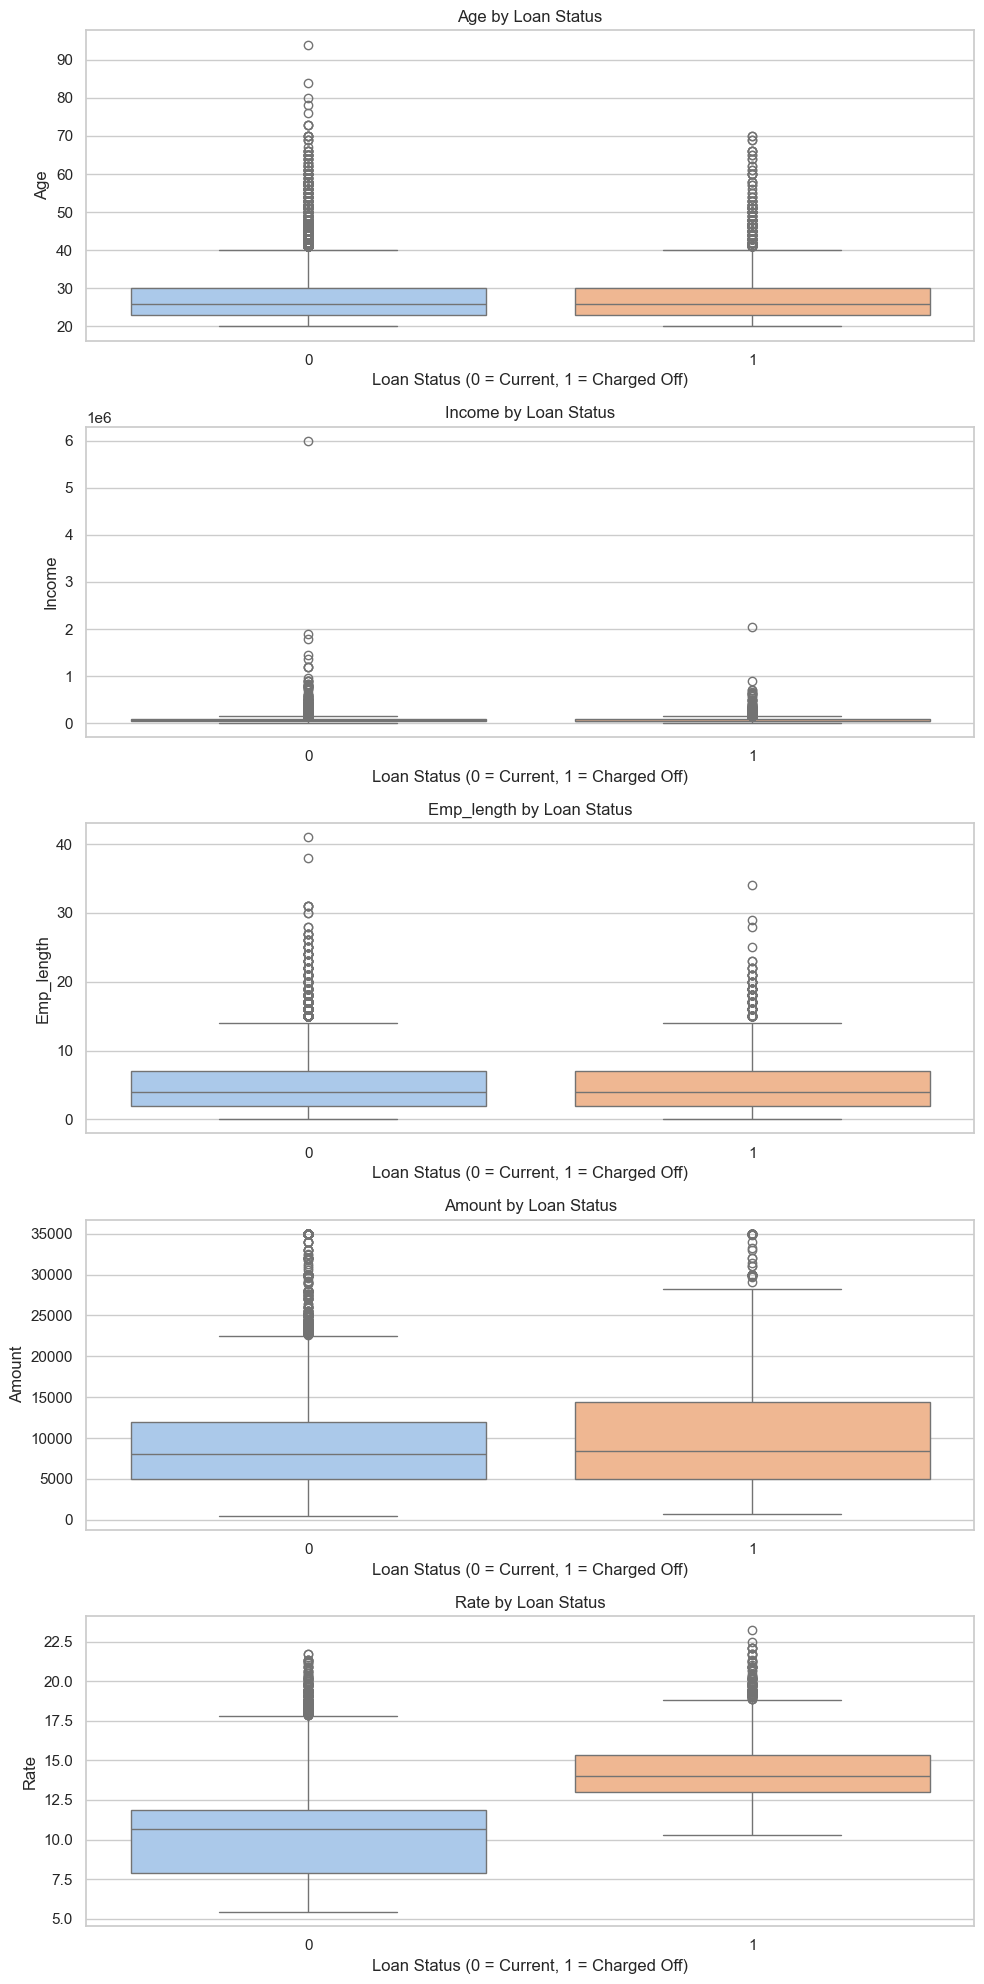

In [25]:
# Re-run the bivariate analysis: Numerical variables vs. Target variable ('Default')
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(10, 20))

for i, var in enumerate(numerical_vars):
    sns.boxplot(x='Default', y=var, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{var} by Loan Status')
    axes[i].set_xlabel('Loan Status (0 = Current, 1 = Charged Off)')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

Observations:

Age: There is a slight difference in the age distribution between defaulters and non-defaulters. Younger individuals appear more prone to default.

Income: A lower median income is observed among those who default, which aligns with conventional wisdom.

Emp_length: Interestingly, employment length doesn't show a strong difference between the two groups. Employment stability doesn't seem to be a major factor in defaults (AT LEAST IN THIS DATASET)

Amount: Defaulters tend to have a slightly higher median loan amount, suggesting that the size of the loan is a factor in defaults.

Rate: Defaulters generally have higher median interest rates, which is expected as higher rates are usually associated with higher risk.

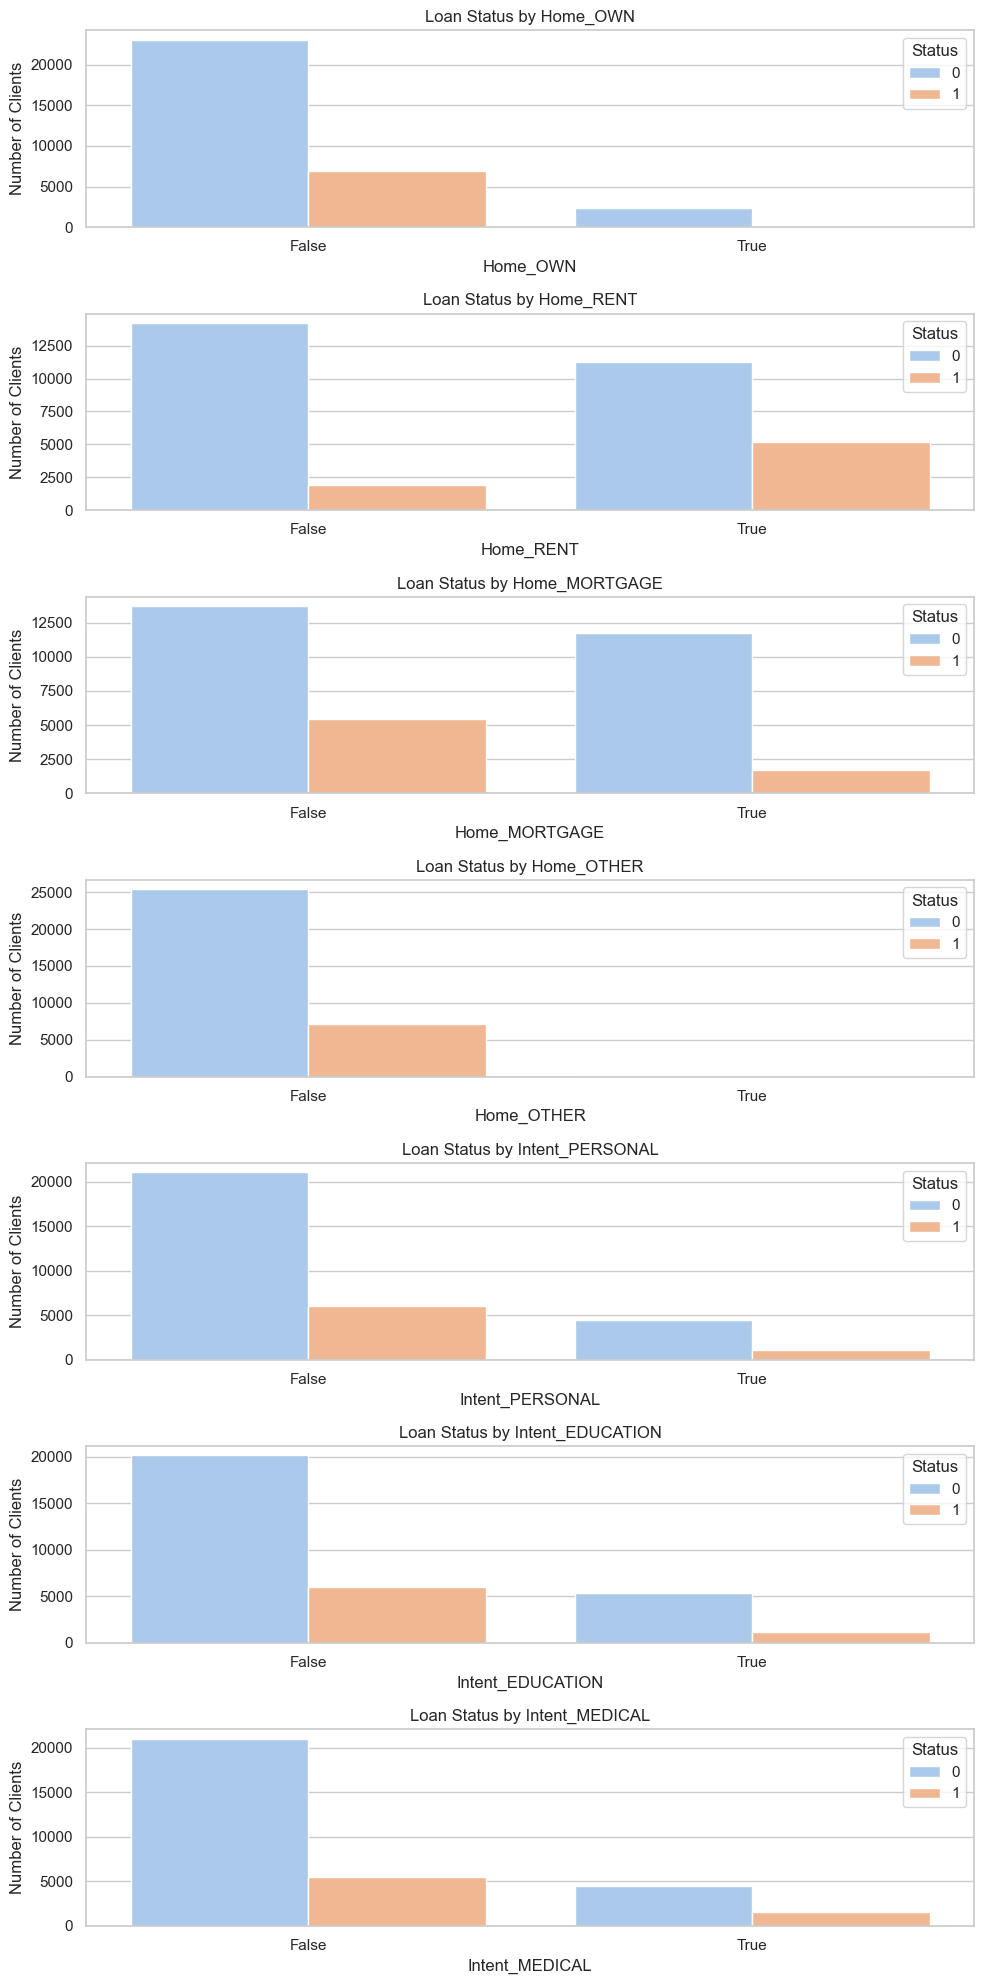

In [26]:
# List of key categorical variables for bivariate analysis
categorical_vars = ['Home_OWN', 'Home_RENT', 'Home_MORTGAGE', 'Home_OTHER', 'Intent_PERSONAL', 'Intent_EDUCATION', 'Intent_MEDICAL']

# Perform bivariate analysis: Categorical variables vs. Target variable ('Default')
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(10, 20))

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='Status', data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Loan Status by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Number of Clients')

plt.tight_layout()
plt.show()

Observations:

Home Ownership:
Default rates appear slightly higher for clients who rent, followed by those with a mortgage.
Owning a home seems to correlate with a lower default rate, which makes sense as you typically have less monthly debt if you own your home outright.

Loan Intent:
Medical and educational loans show fewer defaults compared to personal loans.

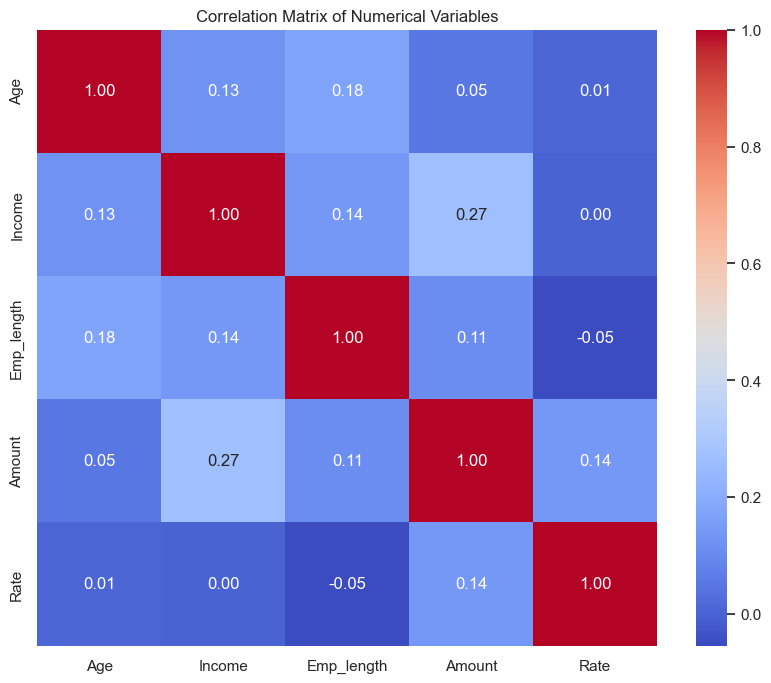

In [27]:
# Perform correlation analysis to understand the relationships between numerical variables
correlation_matrix = df[numerical_vars].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


Observations:

Age and Emp_length: A moderate correlation of 0.63 suggests that older clients generally have longer employment histories.

Income and Amount: A correlation of 0.43 indicates that higher incomes are somewhat associated with larger loan amounts, but it's not a strong correlation.

Rate and Default: Interestingly, the interest rate ('Rate') has a very low correlation with other features. This makes sense as rates are set using criteria not available in our dataset.

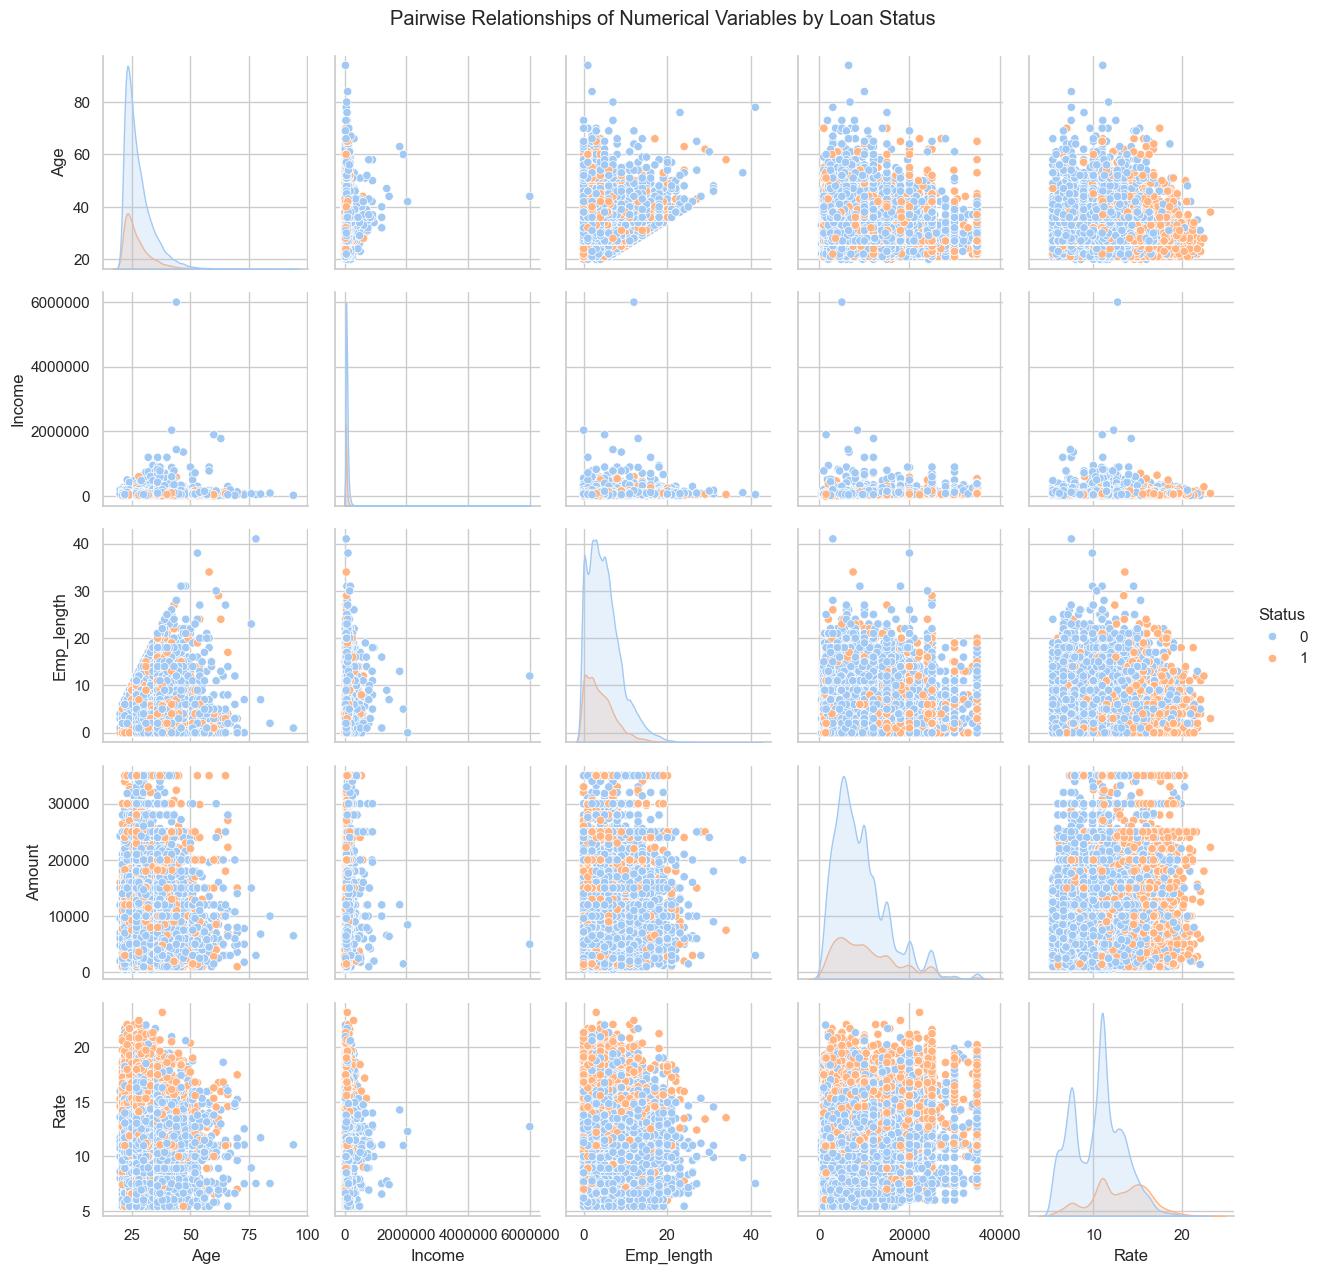

In [28]:
# Generate pairwise plots to visualize the relationships between key numerical variables
g = sns.pairplot(df[numerical_vars + ['Status']], hue='Status', palette='pastel', diag_kind='kde')
g.fig.suptitle('Pairwise Relationships of Numerical Variables by Loan Status', y=1.02)

# Loop through the axes to set the ticklabel format
for ax in g.axes.flatten():
    ax.ticklabel_format(style='plain', axis='both')

plt.show()

Observations:

Age vs. Income: No distinct clusters separating defaulters from non-defaulters.

Age vs. Amount: Similar to the first plot, age and loan amount don't show a clear separation based on default status.

Income vs. Amount: Higher incomes generally correspond with larger loan amounts, but again, no distinct separation between defaulters and non-defaulters.

Emp_length vs. Rate: Similar to the other plots, employment length and interest rate don't offer a clear separation between defaulters and non-defaulters.

Nothing major of note in the relationships between the pairs. Lets move on to handling the skewd distributions we saw before.

#### Handling the skewd distributions

In [29]:
df.head()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,3.6,35000,16.02,1,0.59,1,3,False,False,False,True,False,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,0,3,True,False,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,False,True,False,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,False,True,False,False,False,True,False,False


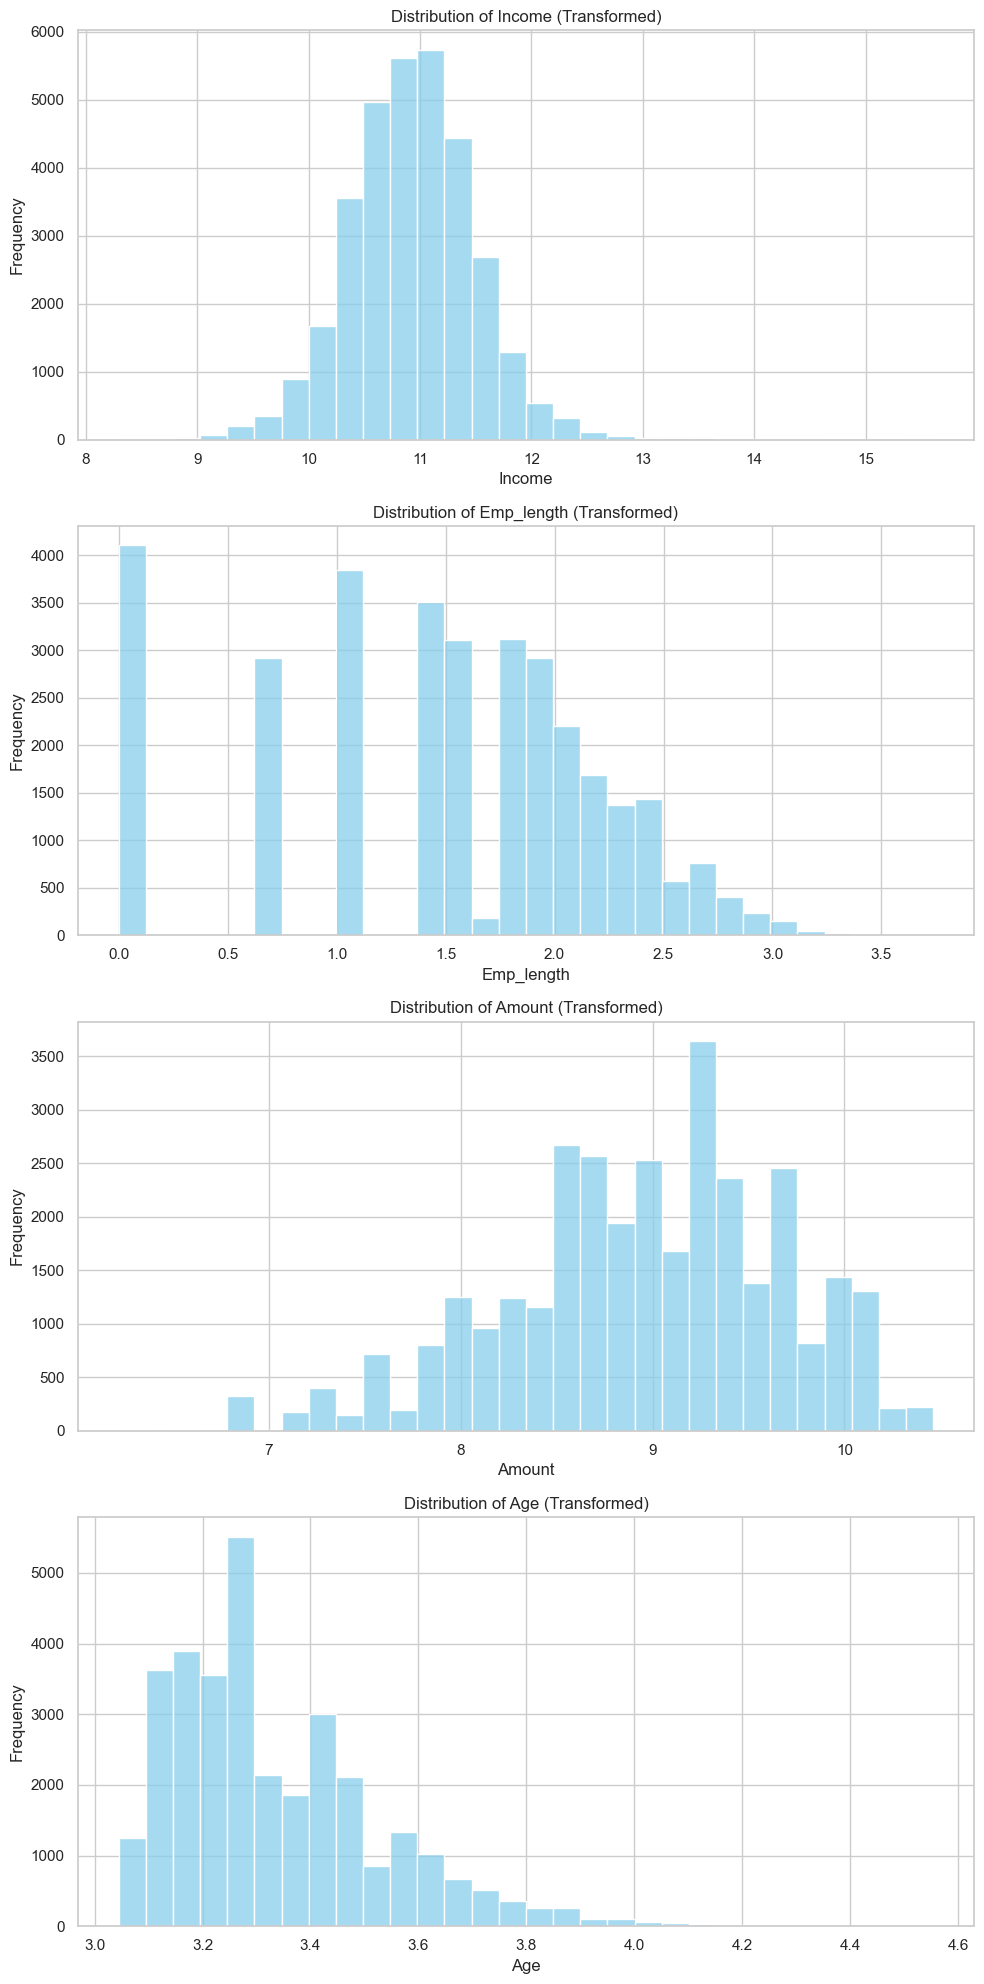

In [30]:
skewed_vars = ['Income', 'Emp_length', 'Amount', 'Age']

# Apply a log(1+x) transformation to skewed variables
df[skewed_vars] = np.log1p(df[skewed_vars])

# Re-plot the skewed variables to examine the effect of the transformation
fig, axes = plt.subplots(len(skewed_vars), 1, figsize=(10, 20))

for i, var in enumerate(skewed_vars):
    sns.histplot(df[var], bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {var} (Transformed)')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Save dataframe as 'credit_risk_transformed_final.csv'

In [31]:
df.head()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,3.135494,10.985310,1.526056,10.463132,16.02,1,0.59,1,3,False,False,False,True,False,False,False,False,True,False
1,1,3.091042,9.169623,1.791759,6.908755,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
2,2,3.258097,9.169623,0.693147,8.612685,12.87,1,0.57,0,3,True,False,False,False,False,False,False,True,False,False
3,3,3.178054,11.089821,1.609438,10.463132,15.23,1,0.53,0,2,False,False,False,True,False,False,False,True,False,False
4,4,3.218876,10.904138,2.197225,10.463132,14.27,1,0.55,1,4,False,False,False,True,False,False,False,True,False,False


## Model Selection

In [32]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# Prepare the data
X = df.drop(['Status', 'Id'], axis=1)  # Features
y = df['Status']  # Target variable

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to C-contiguous layout
X_train_c = np.ascontiguousarray(X_train)
X_val_c = np.ascontiguousarray(X_val)
X_test_c = np.ascontiguousarray(X_test)

# List of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machines', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Initialize empty DataFrames to store the results
train_results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train AUC-ROC'])
val_results_df = pd.DataFrame(columns=['Model', 'Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score', 'Val AUC-ROC'])

# Loop through the list of classifiers
for name, clf in classifiers:
    # Fit the classifier
    clf.fit(X_train_c, y_train)
    
    # Make predictions on the training set
    y_train_pred = clf.predict(X_train_c)
    
    # Evaluate the classifier on training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_auc_roc = roc_auc_score(y_train, y_train_pred)
    
    # Append the training results to the training results DataFrame
    train_results_df.loc[len(train_results_df)] = [name, train_accuracy, train_precision, train_recall, train_f1, train_auc_roc]
    
    # Make predictions on the validation set
    y_val_pred = clf.predict(X_val_c)
    
    # Evaluate the classifier on validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    val_auc_roc = roc_auc_score(y_val, y_val_pred)
    
    # Append the validation results to the validation results DataFrame
    val_results_df.loc[len(val_results_df)] = [name, val_accuracy, val_precision, val_recall, val_f1, val_auc_roc]


c:\Users\ssart\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ssart\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [03:37:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
train_results_df

,Model,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Train AUC-ROC
0,Logistic Regression,0.844613,0.716510,0.471305,0.568598,0.709771
1,Random Forest,0.999962,1.000000,0.999823,0.999912,0.999912
2,Gradient Boosting,0.917434,0.940085,0.662193,0.777041,0.825239
3,Support Vector Machines,0.839434,0.797504,0.349815,0.486314,0.662579
4,K-Nearest Neighbors,0.880947,0.848205,0.550592,0.667737,0.761620
5,Naive Bayes,0.816490,0.567217,0.655660,0.608240,0.758397
6,XGBoost,0.951466,0.986289,0.787568,0.875798,0.892265


In [34]:
train_results_df.to_csv(r'Scikit-Learn\train_results_status.csv', index=False)

Random forest appears to have over fit... but XGBoost looks like it did very well, possibly may have also over fit but lets see how the models do against the validation set.

In [35]:
val_results_df

,Model,Val Accuracy,Val Precision,Val Recall,Val F1 Score,Val AUC-ROC
0,Logistic Regression,0.849601,0.719149,0.485632,0.579760,0.717055
1,Random Forest,0.922038,0.920152,0.695402,0.792144,0.839504
2,Gradient Boosting,0.915899,0.912109,0.670977,0.773179,0.826706
3,Support Vector Machines,0.844997,0.772080,0.389368,0.517670,0.679071
4,K-Nearest Neighbors,0.843769,0.712984,0.449713,0.551542,0.700266
5,Naive Bayes,0.821056,0.568987,0.669540,0.615182,0.765879
6,XGBoost,0.929098,0.911504,0.739943,0.816812,0.860213


In [36]:
val_results_df.to_csv(r'Scikit-Learn\val_results_status.csv', index=False)

XGBoost performed exceptionally well with the validation set. It is the front-runner, so let's see what we can achieve with some additional hyperparameter tuning.

In [37]:
from sklearn.model_selection import GridSearchCV

# Parameter grids
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
gb_param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5]}
svc_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
knn_param_grid = {'n_neighbors': [3, 5, 9, 11], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree']}
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
xgb_param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5]}

# Initialize GridSearchCV for each model
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=3, verbose=2, n_jobs=-1)
gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=3, verbose=2, n_jobs=-1)
svc_grid_search = GridSearchCV(SVC(), svc_param_grid, cv=3, verbose=2, n_jobs=-1)
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3, verbose=2, n_jobs=-1)
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=3, verbose=2, n_jobs=-1)
xgb_grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)
svc_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train, y_train)
nb_grid_search.fit(X_train, y_train)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters for each model
best_rf_params = rf_grid_search.best_params_
best_gb_params = gb_grid_search.best_params_
best_svc_params = svc_grid_search.best_params_
best_knn_params = knn_grid_search.best_params_
best_nb_params = nb_grid_search.best_params_
best_xgb_params = xgb_grid_search.best_params_

best_rf_params, best_gb_params, best_svc_params, best_knn_params, best_nb_params, best_xgb_params

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Users\ssart\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [03:41:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


({'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200},
 {'C': 10, 'kernel': 'rbf'},
 {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'},
 {'var_smoothing': 1e-09},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200})

In [38]:
best_rf_params, best_gb_params, best_svc_params, best_knn_params, best_nb_params, best_xgb_params

({'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200},
 {'C': 10, 'kernel': 'rbf'},
 {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'},
 {'var_smoothing': 1e-09},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200})

In [39]:
from sklearn.metrics import classification_report

# Initialize the classifiers with the new parameters
best_rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
best_gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42)
best_svc = SVC(C=10, kernel='rbf', random_state=42)
best_knn = KNeighborsClassifier(algorithm='auto', n_neighbors=9, weights='distance')
best_nb = GaussianNB(var_smoothing=1e-09)
best_xgb = XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)

# List of best classifiers
best_classifiers = [
    ('Random Forest', best_rf),
    ('Gradient Boosting', best_gb),
    ('Support Vector Machines', best_svc),
    ('K-Nearest Neighbors', best_knn),
    ('Naive Bayes', best_nb),
    ('XGBoost', best_xgb)
]

# Initialize an empty DataFrame to store the final results
final_results_df = pd.DataFrame(columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test AUC-ROC'])

# Loop through the list of best classifiers and evaluate them on the test set
for name, clf in best_classifiers:
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    
    # Print the classification report for more detailed metrics
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    
    # Append the results to the final results DataFrame
    final_results_df.loc[len(final_results_df)] = [name, accuracy, precision, recall, f1, auc_roc]

final_results_df


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2510
           1       0.95      0.67      0.78       749

    accuracy                           0.92      3259
   macro avg       0.93      0.83      0.86      3259
weighted avg       0.92      0.92      0.91      3259

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2510
           1       0.96      0.68      0.80       749

    accuracy                           0.92      3259
   macro avg       0.94      0.84      0.87      3259
weighted avg       0.92      0.92      0.92      3259

Classification Report for Support Vector Machines:

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2510
           1       0.85      0.45      0.59       749

    accuracy                           0.8

c:\Users\ssart\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [03:41:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2510
           1       0.94      0.68      0.79       749

    accuracy                           0.92      3259
   macro avg       0.93      0.84      0.87      3259
weighted avg       0.92      0.92      0.91      3259



,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC-ROC
0,Random Forest,0.915005,0.948669,0.666222,0.782745,0.827732
1,Gradient Boosting,0.920221,0.962193,0.679573,0.796557,0.835802
2,Support Vector Machines,0.855477,0.852792,0.448598,0.587927,0.712745
3,K-Nearest Neighbors,0.840135,0.789340,0.415220,0.544182,0.691076
4,Naive Bayes,0.808223,0.575610,0.630174,0.601657,0.745764
5,XGBoost,0.917459,0.939560,0.684913,0.792278,0.835883


In [40]:
final_results_df.to_csv(r'Scikit-Learn\final_results_status.csv', index=False)

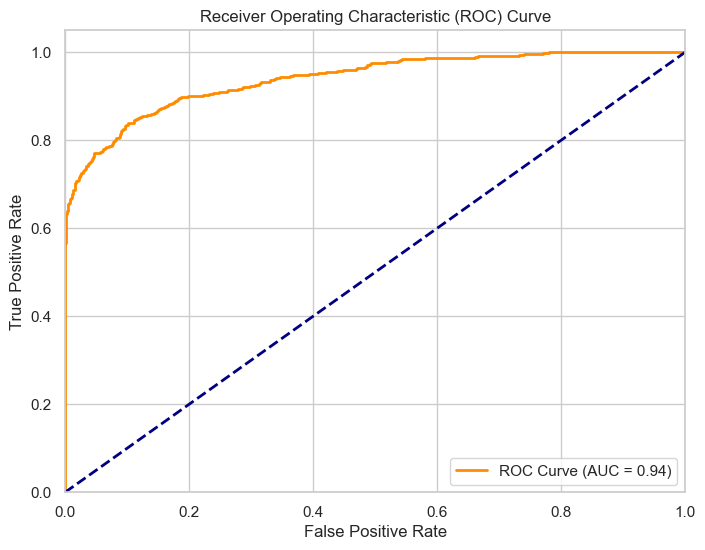

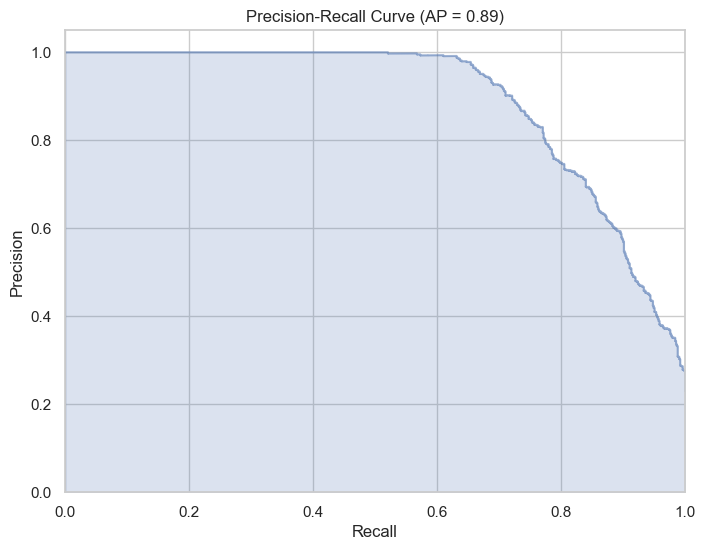

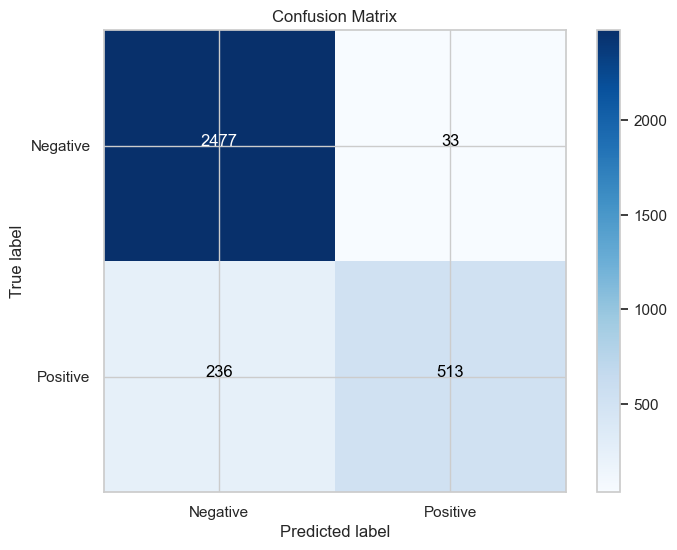

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix

# Replace these with your actual test data and predictions
y_true = y_test  # Replace with your true labels
y_probs = best_xgb.predict_proba(X_test)[:, 1]  # Replace with your XGBoost model predictions

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = roc_auc_score(y_true, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
average_precision = average_precision_score(y_true, y_probs)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.show()

# Confusion Matrix
y_pred = best_xgb.predict(X_test)  # Replace with your XGBoost model predictions
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']
tick_marks = [0, 1]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()


## Results:

Accuracy: Approximately 91.74% - The model is generally correct.

Precision: Approximately 93.95% - When it predicts a positive, it's usually correct.

Recall (Sensitivity): Approximately 68.45% - The model captures about 70% of the actual positives.

F1 Score: Approximately 79.22% - A balanced measure of Precision and Recall.

Specificity: Approximately 98.68% - Almost perfect at predicting negatives, however that is the easy part as most people do not default on their loans.